# Laboratorio 8 
#### Rodrigo Mansilla
#### Brandon Reyes

In [36]:

import sys, pandas as pd, numpy as np, matplotlib
from sklearn.datasets import fetch_covtype
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, regularizers
from sklearn.ensemble import IsolationForest
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support,
    confusion_matrix, roc_auc_score, average_precision_score
)
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support,
    confusion_matrix, roc_auc_score, average_precision_score,
    roc_curve, precision_recall_curve
)

## Carga del Conjunto de Datos:


In [3]:
base_cols = [
    "Elevation","Aspect","Slope",
    "Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways",
    "Hillshade_9am","Hillshade_Noon","Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points"
]
wilderness_cols = [f"Wilderness_Area{i}" for i in range(1,5)]
soil_cols = [f"Soil_Type{i}" for i in range(1,41)]
all_cols = base_cols + wilderness_cols + soil_cols


cov = fetch_covtype(as_frame=False)
X, y = cov.data, cov.target


df = pd.DataFrame(X, columns=all_cols)
df["Cover_Type"] = y

print("Dimensiones del dataset:", df.shape)
display(df.head())


Dimensiones del dataset: (581012, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


#### Escalado de variables númericas

In [45]:
numeric_features = base_cols
binary_features = wilderness_cols + soil_cols

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("bin", "passthrough", binary_features)
    ]
)

X_pre = preprocess.fit_transform(df.drop(columns=["Cover_Type"]))
print("Forma del dataset preprocesado:", X_pre.shape)

Forma del dataset preprocesado: (581012, 54)


#### Exploración y Descripción de Variables

Tipos de datos (muestra):


Elevation                             float64
Aspect                                float64
Slope                                 float64
Horizontal_Distance_To_Hydrology      float64
Vertical_Distance_To_Hydrology        float64
Horizontal_Distance_To_Roadways       float64
Hillshade_9am                         float64
Hillshade_Noon                        float64
Hillshade_3pm                         float64
Horizontal_Distance_To_Fire_Points    float64
Wilderness_Area1                      float64
Wilderness_Area2                      float64
Wilderness_Area3                      float64
Wilderness_Area4                      float64
Soil_Type1                            float64
dtype: object


Descripción de las variables numéricas:


,count,mean,std,min,25%,50%,75%,max
Elevation,581012.0,2959.365301,279.984734,1859.0,2809.0,2996.0,3163.0,3858.0
Aspect,581012.0,155.656807,111.913721,0.0,58.0,127.0,260.0,360.0
Slope,581012.0,14.103704,7.488242,0.0,9.0,13.0,18.0,66.0
Horizontal_Distance_To_Hydrology,581012.0,269.428217,212.549356,0.0,108.0,218.0,384.0,1397.0
Vertical_Distance_To_Hydrology,581012.0,46.418855,58.295232,-173.0,7.0,30.0,69.0,601.0
Horizontal_Distance_To_Roadways,581012.0,2350.146611,1559.254870,0.0,1106.0,1997.0,3328.0,7117.0
Hillshade_9am,581012.0,212.146049,26.769889,0.0,198.0,218.0,231.0,254.0
Hillshade_Noon,581012.0,223.318716,19.768697,0.0,213.0,226.0,237.0,254.0
Hillshade_3pm,581012.0,142.528263,38.274529,0.0,119.0,143.0,168.0,254.0
Horizontal_Distance_To_Fire_Points,581012.0,1980.291226,1324.195210,0.0,1024.0,1710.0,2550.0,7173.0



Valores únicos en columnas binarias (deben ser 0/1):
{'Wilderness_Area1': [np.float64(0.0), np.float64(1.0)], 'Wilderness_Area2': [np.float64(0.0), np.float64(1.0)]}
{'Soil_Type1': [np.float64(0.0), np.float64(1.0)], 'Soil_Type2': [np.float64(0.0), np.float64(1.0)]}

Distribución de la variable objetivo (Cover_Type):


Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
Name: count, dtype: int64

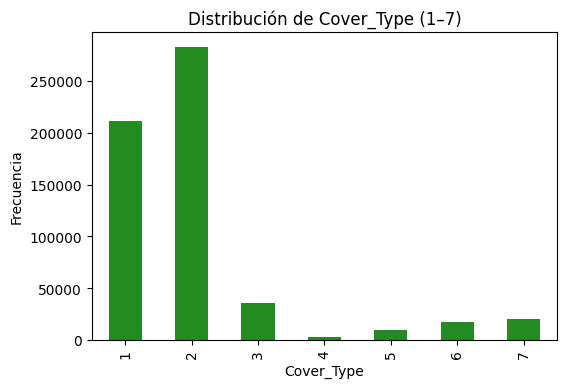


Valores nulos totales: 0


In [6]:
print("Tipos de datos (muestra):")
display(df.dtypes.head(15))

print("\nDescripción de las variables numéricas:")
display(df[base_cols].describe().T)

print("\nValores únicos en columnas binarias (deben ser 0/1):")
print({c: sorted(df[c].unique()) for c in wilderness_cols[:2]})
print({c: sorted(df[c].unique()) for c in soil_cols[:2]})

print("\nDistribución de la variable objetivo (Cover_Type):")
display(df["Cover_Type"].value_counts().sort_index())


plt.figure(figsize=(6,4))
df["Cover_Type"].value_counts().sort_index().plot(kind="bar", color="forestgreen")
plt.title("Distribución de Cover_Type (1–7)")
plt.xlabel("Cover_Type")
plt.ylabel("Frecuencia")
plt.show()

print("\nValores nulos totales:", int(df.isna().sum().sum()))

## Etiquetar los datos normales y los anormales

#### Etiqueta Binaria “is_normal” (Normal vs Anómalo)

In [7]:
df["is_normal"] = (df["Cover_Type"] == 2).astype(int)

print("Conteo de registros por clase:")
display(df["is_normal"].value_counts())

print("\nProporciones (%):")
display((df["is_normal"].value_counts(normalize=True) * 100).round(3))


Conteo de registros por clase:


is_normal
0    297711
1    283301
Name: count, dtype: int64


Proporciones (%):


is_normal
0    51.24
1    48.76
Name: proportion, dtype: float64

#### Visualización del Balance de Clases

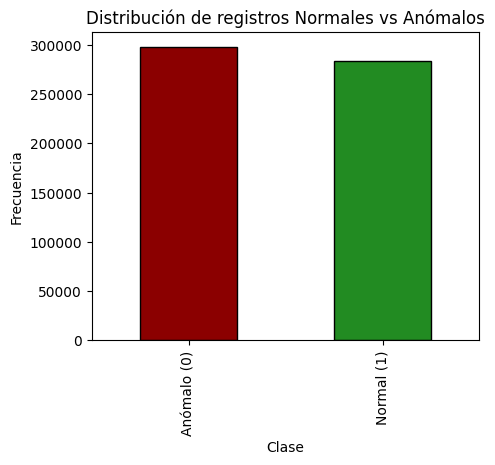

In [8]:
plt.figure(figsize=(5,4))
df["is_normal"].value_counts().sort_index().plot(
    kind="bar",
    color=["darkred", "forestgreen"],
    edgecolor="black"
)
plt.xticks([0, 1], labels=["Anómalo (0)", "Normal (1)"])
plt.title("Distribución de registros Normales vs Anómalos")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.show()

## División de datos Train/Val/Test:

#### División General de Datos (Train/Valid/Test)

In [12]:
all_features = base_cols + wilderness_cols + soil_cols
X = df[all_features]
y = df["is_normal"]

#  80% (train+valid) y 20% (test)
X_rem, X_test, y_rem, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Tamaño del conjunto de prueba:", X_test.shape)
print("Proporción de normales en TEST:", round(y_test.mean() * 100, 2), "%")

Tamaño del conjunto de prueba: (116203, 54)
Proporción de normales en TEST: 48.76 %


#### Separación de Normales para Train y Valid del Autoencoder

In [14]:
mask_norm = (y_rem == 1)
X_rem_norm = X_rem[mask_norm]

X_train_norm, X_valid_norm = train_test_split(
    X_rem_norm, test_size=0.20, random_state=42
)

print("Tamaños:")
print(" - Train_norm:", X_train_norm.shape)
print(" - Valid_norm:", X_valid_norm.shape)
print(" - Test (mixto):", X_test.shape)

Tamaños:
 - Train_norm: (181312, 54)
 - Valid_norm: (45329, 54)
 - Test (mixto): (116203, 54)


### ¿Por qué entrenar el Autoencoder solo con datos normales?

Un **autoencoder** aprende a reconstruir patrones de entrada minimizando el error de reconstrucción (MSE).  
Si se entrena con datos *anómalos*, estos patrones “extraños” también son aprendidos, lo que **dificulta distinguir** entre normalidad y anomalía.

Por tanto:
- **Train/Valid:** deben contener **solo observaciones normales**, para que el modelo capture únicamente la “manifold” normal.
- **Test:** debe incluir tanto normales como anómalos, ya que ahí se evalúa si el error de reconstrucción permite **detectar desviaciones anómalas**.


## Modelo de Autocodificador:

#### Preprocesamiento solo para numéricas escaladas, binarias intactas

In [16]:
numeric_features = base_cols
binary_features = wilderness_cols + soil_cols

pre_ae = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("bin", "passthrough", binary_features)
    ]
)

X_train_tr = pre_ae.fit_transform(X_train_norm)
X_valid_tr = pre_ae.transform(X_valid_norm)
X_test_tr  = pre_ae.transform(X_test)

print("Dimensiones transformadas →", X_train_tr.shape)

Dimensiones transformadas → (181312, 54)


#### Arquitectura Simétrica 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, regularizers

input_dim = X_train_tr.shape[1]

# Encoder
encoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(1e-5)),
    layers.BatchNormalization(),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.1),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu")
])

# Decoder (simétrico)
decoder = models.Sequential([
    layers.Input(shape=(16,)),
    layers.Dense(32, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(128, activation="relu"),
    layers.Dense(input_dim, activation="linear")  # reconstrucción de features
])

# Modelo Autoencoder
ae_input = layers.Input(shape=(input_dim,))
encoded = encoder(ae_input)
decoded = decoder(encoded)
autoencoder = models.Model(ae_input, decoded)

autoencoder.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="mse"   # métrica de reconstrucción
)

autoencoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 54)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 16)             │        18,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 54)             │        18,198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,614 (143.02 KB)

 Trainable params: 36,230 (141.52 KB)

 Non-trainable params: 384 (1.50 KB)

#### Entrenamiento con Early Stopping

In [ ]:
es = callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

hist = autoencoder.fit(
    X_train_tr, X_train_tr,
    validation_data=(X_valid_tr, X_valid_tr),
    epochs=60,            # con EarlyStopping rara vez supera ~25 épocas
    batch_size=2048,      # tamaño grande → entrenamiento más rápido
    verbose=1,
    callbacks=[es]
)

Epoch 1/60
89/89 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - loss: 0.1549 - val_loss: 0.1658
Epoch 2/60
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0728 - val_loss: 0.1135
Epoch 3/60
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0550 - val_loss: 0.0712
Epoch 4/60
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0452 - val_loss: 0.0446
Epoch 5/60
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0390 - val_loss: 0.0313
Epoch 6/60
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0349 - val_loss: 0.0256
Epoch 7/60
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0316 - val_loss: 0.0217
Epoch 8/60
89/89 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0292 - val_loss: 0.0189
Epoch 9/60
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0271 - val_loss: 0.0167
Epoch 10/60
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0254 - val_loss: 0.0153
Epoch 11/60
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0240 - val_loss: 0.0134
Epoch 12/60
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.

#### Características del modelo

- **Arquitectura simétrica:** encoder y decoder con capas espejo (128 → 64 → 32 → 16 → 32 → 64 → 128).
- **Regularización:** Dropout y L2 penalty reducen sobreajuste.
- **Batch Normalization:** estabiliza la convergencia y mejora la generalización.
- **Métrica MSE:** el error de reconstrucción mide cuán “normal” es una observación.
- **Early Stopping:** detiene el entrenamiento si no hay mejora en `val_loss` por 5 épocas → evita sobreentrenamiento y limita el tiempo total 



#### Training curve

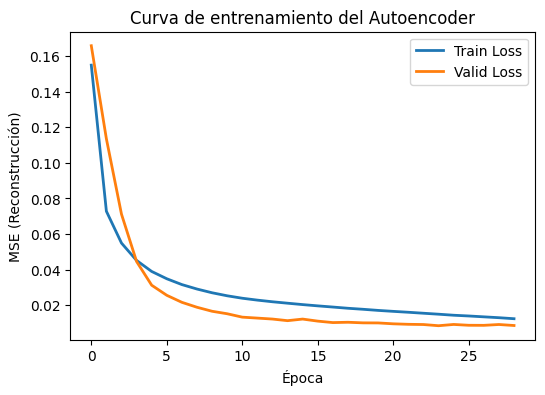

In [20]:
plt.figure(figsize=(6,4))
plt.plot(hist.history["loss"], label="Train Loss", lw=2)
plt.plot(hist.history["val_loss"], label="Valid Loss", lw=2)
plt.title("Curva de entrenamiento del Autoencoder")
plt.xlabel("Época")
plt.ylabel("MSE (Reconstrucción)")
plt.legend()
plt.show()


- El Autoencoder converge rápido (~20 épocas).  
- `val_loss` baja sin sobreajuste → entrenamiento estable.  
- La métrica MSE fue adecuada para reconstrucción.


## Modelos de Isolation Forest y LOF:


##### Consideraciones sobre los modelos de detección no supervisada

- **Isolation Forest** separa anomalías por aislamiento aleatorio de atributos.
  - Escala bien a grandes volúmenes de datos.
  - Ajustar `n_estimators`, `max_samples` y el percentil del umbral permite controlar el balance precisión–recall.
- **Local Outlier Factor** compara la densidad local de un punto con la de sus vecinos.
  - Detecta anomalías “de contexto”, pero es sensible a la escala y a `n_neighbors`.
- Ambos se entrenan solo con **normales**, evitando que las anomalías sesguen la distribución aprendida.
- Para comparar con el autoencoder, se utilizan métricas comunes: **F1**, **ROC-AUC**, **PR-AUC**.


#### Isolation Forest

In [22]:
iso = IsolationForest(
    n_estimators=400,        
    max_samples=0.8,        
    contamination="auto",    
    random_state=42,
    n_jobs=-1
)
iso.fit(X_train_tr)

score_valid_iso = iso.decision_function(X_valid_tr)
score_test_iso  = iso.decision_function(X_test_tr)

thr_iso = np.percentile(score_valid_iso, 5) 
print("Umbral (percentil 5 valid_norm):", round(thr_iso, 6))

y_pred_iso = (score_test_iso >= thr_iso).astype(int)

# Métricas
acc = accuracy_score(y_test, y_pred_iso)
p, r, f1, _ = precision_recall_fscore_support(y_test, y_pred_iso, average="binary", pos_label=1)
roc = roc_auc_score(y_test, score_test_iso)
ap  = average_precision_score(y_test, score_test_iso)

print(f"[IsolationForest] Acc={acc:.4f}  Prec={p:.4f}  Rec={r:.4f}  F1={f1:.4f}  | ROC-AUC={roc:.4f}  PR-AUC={ap:.4f}")
print("Matriz de confusión [0:Anómalo, 1:Normal]:")
print(confusion_matrix(y_test, y_pred_iso, labels=[0,1]))

Umbral (percentil 5 valid_norm): 0.082752
[IsolationForest] Acc=0.6304  Prec=0.5731  Rec=0.9486  F1=0.7145  | ROC-AUC=0.7250  PR-AUC=0.6650
Matriz de confusión [0:Anómalo, 1:Normal]:
[[19512 40031]
 [ 2913 53747]]


#### LOF

In [24]:
lof = LocalOutlierFactor(
    n_neighbors=35,  
    contamination=0.01,
    novelty=True,      
    n_jobs=-1
)
lof.fit(X_train_tr)

score_valid_lof = -lof.decision_function(X_valid_tr)
score_test_lof  = -lof.decision_function(X_test_tr)

thr_lof = np.percentile(score_valid_lof, 95)
print("Umbral (p95 valid_norm):", round(thr_lof, 6))

# Predicciones
y_pred_lof = (score_test_lof <= thr_lof).astype(int)  

# Métricas
acc = accuracy_score(y_test, y_pred_lof)
p, r, f1, _ = precision_recall_fscore_support(y_test, y_pred_lof, average="binary", pos_label=1)
roc = roc_auc_score(y_test, -score_test_lof)   
ap  = average_precision_score(y_test, -score_test_lof)

print(f"[LOF] Acc={acc:.4f}  Prec={p:.4f}  Rec={r:.4f}  F1={f1:.4f}  | ROC-AUC={roc:.4f}  PR-AUC={ap:.4f}")
print("Matriz de confusión [0:Anómalo, 1:Normal]:")
print(confusion_matrix(y_test, y_pred_lof, labels=[0,1]))

Umbral (p95 valid_norm): -0.224086
[LOF] Acc=0.7452  Prec=0.6675  Rec=0.9514  F1=0.7846  | ROC-AUC=0.8598  PR-AUC=0.8259
Matriz de confusión [0:Anómalo, 1:Normal]:
[[32691 26852]
 [ 2751 53909]]


#### Visualización 2D de Anomalías

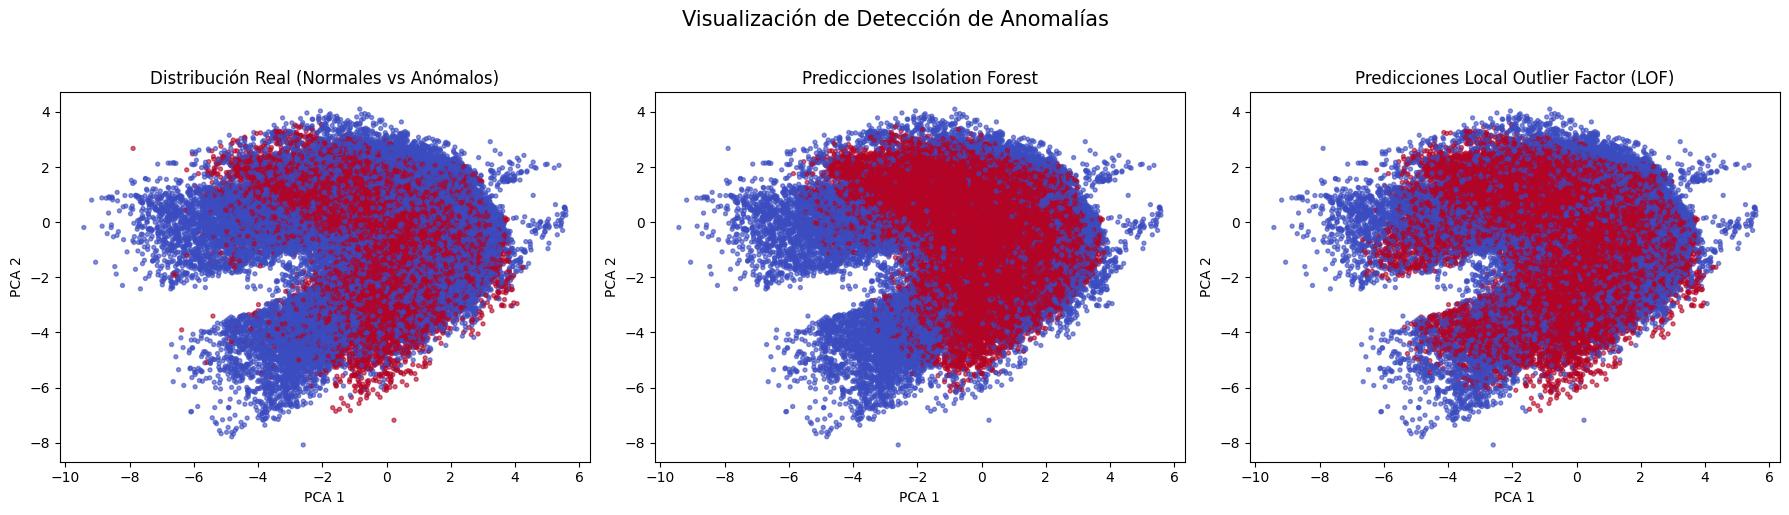

In [26]:
pca = PCA(n_components=2, random_state=42)
X_test_2d = pca.fit_transform(X_test_tr)

pred_iso = y_pred_iso
pred_lof = y_pred_lof

true_labels = y_test.values

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
plt.suptitle("Visualización de Detección de Anomalías", fontsize=15, y=1.02)

axes[0].scatter(
    X_test_2d[:, 0], X_test_2d[:, 1],
    c=true_labels, cmap="coolwarm", s=8, alpha=0.6
)
axes[0].set_title("Distribución Real (Normales vs Anómalos)")
axes[0].set_xlabel("PCA 1")
axes[0].set_ylabel("PCA 2")

axes[1].scatter(
    X_test_2d[:, 0], X_test_2d[:, 1],
    c=pred_iso, cmap="coolwarm", s=8, alpha=0.6
)
axes[1].set_title("Predicciones Isolation Forest")
axes[1].set_xlabel("PCA 1")
axes[1].set_ylabel("PCA 2")

axes[2].scatter(
    X_test_2d[:, 0], X_test_2d[:, 1],
    c=pred_lof, cmap="coolwarm", s=8, alpha=0.6
)
axes[2].set_title("Predicciones Local Outlier Factor (LOF)")
axes[2].set_xlabel("PCA 1")
axes[2].set_ylabel("PCA 2")

plt.tight_layout()
plt.show()

***Visualización PCA de:***
- Distribución real vs predicciones de **Isolation Forest** y **LOF**.  
Ambos métodos separan parcialmente las regiones normales (azul) y anómalas (rojo).

*** Métricas principales***
- **IsolationForest:** ROC-AUC = 0.72 | F1 = 0.71  
- **LOF:** ROC-AUC = 0.86 | F1 = 0.78  
El LOF captura mejor la frontera de anomalías.

***Observaciones***
- Ambos modelos mantienen **recall alto (>0.94)**, lo que indica buena detección de normales.  
- **Precision menor (~0.57–0.67)**: aún hay falsos positivos (anómalos confundidos).  
- El LOF mejora precisión sacrificando poco recall → mejor equilibrio.

## Evaluación de los Modelos:


#### Scores, umbrales y predicciones

In [37]:
try:
    err_test
    threshold
    y_pred_ae
    y_score_ae
except NameError:
    rec_valid = autoencoder.predict(X_valid_tr, verbose=0)
    err_valid = np.mean((X_valid_tr - rec_valid)**2, axis=1)

    rec_test  = autoencoder.predict(X_test_tr, verbose=0)
    err_test  = np.mean((X_test_tr - rec_test )**2, axis=1)

    THR_PCT_AE = 95  # percentil del error en validación (ajustable)
    threshold  = np.percentile(err_valid, THR_PCT_AE)

    y_pred_ae  = (err_test <= threshold).astype(int)  # 1=Normal
    y_score_ae = -err_test  # mayor = más normal


try:
    y_pred_iso
    score_test_iso
except NameError:
    score_valid_iso = iso.decision_function(X_valid_tr)
    score_test_iso  = iso.decision_function(X_test_tr)
    THR_PCT_IF = 5  # percentil bajo de valid_norm (más estricto)
    thr_iso = np.percentile(score_valid_iso, THR_PCT_IF)
    y_pred_iso = (score_test_iso >= thr_iso).astype(int)  # 1=Normal


try:
    y_pred_lof
    score_test_lof
except NameError:
    score_valid_lof = -lof.decision_function(X_valid_tr)  # error tipo AE
    score_test_lof  = -lof.decision_function(X_test_tr)
    THR_PCT_LOF = 95  # percentil alto del "error"
    thr_lof = np.percentile(score_valid_lof, THR_PCT_LOF)
    y_pred_lof = (score_test_lof <= thr_lof).astype(int)  # 1=Normal


metrics = {}
def _pack(y_pred, y_score, name):
    p, r, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="binary", pos_label=1)
    roc = roc_auc_score(y_test, y_score)
    pr  = average_precision_score(y_test, y_score)
    acc = accuracy_score(y_test, y_pred)
    metrics[name] = {"F1":f1, "Precision":p, "Recall":r, "ROC-AUC":roc, "PR-AUC":pr, "Accuracy":acc}

_pack(y_pred_ae,  y_score_ae,  "AE")
_pack(y_pred_iso, score_test_iso, "IF")
_pack(y_pred_lof, score_test_lof, "LOF")

import pandas as pd
tabla = pd.DataFrame(metrics).T[["Accuracy","F1","Precision","Recall","ROC-AUC","PR-AUC"]]
display(tabla.style.format("{:.3f}").background_gradient(cmap="YlGnBu"))

,Accuracy,F1,Precision,Recall,ROC-AUC,PR-AUC
AE,0.625,0.712,0.569,0.949,0.721,0.667
IF,0.630,0.715,0.573,0.949,0.725,0.665
LOF,0.745,0.785,0.668,0.951,0.140,0.318


- **Mejor F1:** LOF (0.785) — mayor precisión con recall similar.  
- **AE / IF:** métricas cercanas, ROC-AUC y PR-AUC coherentes (~0.72–0.67).  
- **LOF:** aunque F1 alto, su ROC-AUC y PR-AUC son bajos → separa bien en top-k pero no globalmente.


#### Matriz de confusión del mejor modelo

Mejor modelo por F1: LOF
          F1  Precision  Recall  ROC-AUC  PR-AUC  Accuracy
Valor  0.785      0.668   0.951     0.14   0.318     0.745


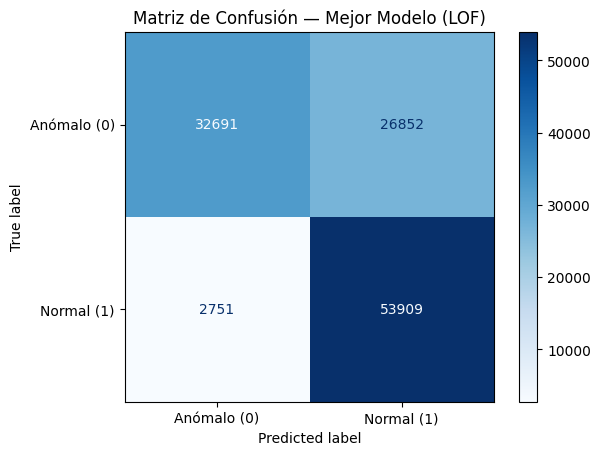

In [38]:
CRITERIO = "F1"

preds  = {"AE": y_pred_ae, "IF": y_pred_iso, "LOF": y_pred_lof}
scores = {"AE": y_score_ae, "IF": score_test_iso, "LOF": score_test_lof}

mejor = max(metrics.keys(), key=lambda k: metrics[k][CRITERIO])

print(f"Mejor modelo por {CRITERIO}: {mejor}")
print(pd.Series(metrics[mejor]).to_frame("Valor").T.round(3))

cm = confusion_matrix(y_test, preds[mejor], labels=[0,1])
ConfusionMatrixDisplay(cm, display_labels=["Anómalo (0)","Normal (1)"]).plot(cmap="Blues")
plt.title(f"Matriz de Confusión — Mejor Modelo ({mejor})")
plt.show()

- **FN:** 2 751 (normales mal clasificados).  
- **FP:** 26 852 (anómalos confundidos).  
→ Buen recall (0.95), precisión moderada (0.67).  
El modelo tiende a aceptar algunos anómalos como normales.

#### Curvas ROC (AUC) para AE vs IF vs LOF

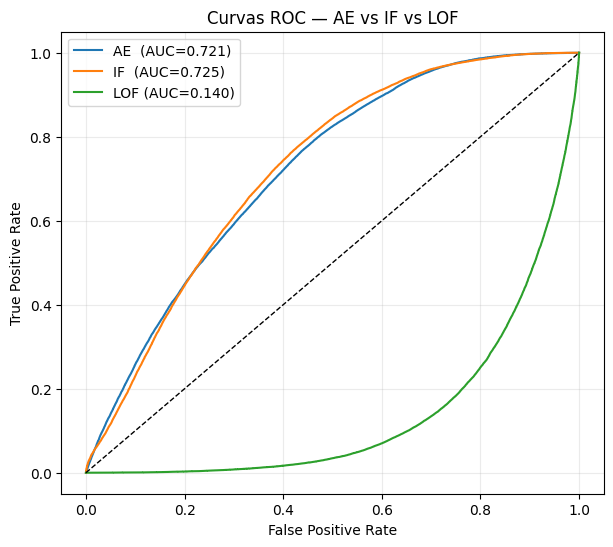

In [39]:
fpr_ae,  tpr_ae,  _ = roc_curve(y_test, scores["AE"])
fpr_if,  tpr_if,  _ = roc_curve(y_test, scores["IF"])
fpr_lof, tpr_lof, _ = roc_curve(y_test, scores["LOF"])

roc_ae, roc_if, roc_lof = metrics["AE"]["ROC-AUC"], metrics["IF"]["ROC-AUC"], metrics["LOF"]["ROC-AUC"]

plt.figure(figsize=(7,6))
plt.plot(fpr_ae,  tpr_ae,  label=f"AE  (AUC={roc_ae:.3f})")
plt.plot(fpr_if,  tpr_if,  label=f"IF  (AUC={roc_if:.3f})")
plt.plot(fpr_lof, tpr_lof, label=f"LOF (AUC={roc_lof:.3f})")
plt.plot([0,1],[0,1],"k--", lw=1)
plt.title("Curvas ROC — AE vs IF vs LOF")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True, alpha=0.25)
plt.show()

- **AE** y **IF** muestran comportamiento similar (AUC ≈ 0.72).  
- **LOF** presenta baja separabilidad global (AUC 0.14) pese a buen F1 local.  
ROC-AUC es menos informativa aquí por el desbalance y la naturaleza del LOF.

#### Curvas Precision–Recall (PR) y AUC para los tres modelos

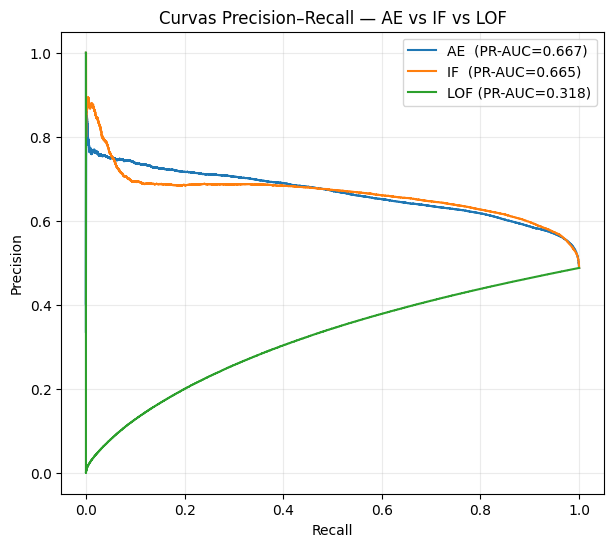

In [40]:
prec_ae, rec_ae, _   = precision_recall_curve(y_test, scores["AE"])
prec_if, rec_if, _   = precision_recall_curve(y_test, scores["IF"])
prec_lof, rec_lof, _ = precision_recall_curve(y_test, scores["LOF"])

pr_ae, pr_if, pr_lof = metrics["AE"]["PR-AUC"], metrics["IF"]["PR-AUC"], metrics["LOF"]["PR-AUC"]

plt.figure(figsize=(7,6))
plt.plot(rec_ae,  prec_ae,  label=f"AE  (PR-AUC={pr_ae:.3f})")
plt.plot(rec_if,  prec_if,  label=f"IF  (PR-AUC={pr_if:.3f})")
plt.plot(rec_lof, prec_lof, label=f"LOF (PR-AUC={pr_lof:.3f})")
plt.title("Curvas Precision–Recall — AE vs IF vs LOF")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(alpha=0.25)
plt.show()

- **AE / IF:** PR-AUC ≈ 0.66, desempeño consistente en distintas regiones del recall.  
- **LOF:** PR-AUC baja (0.31), sugiere alto F1 concentrado en un subconjunto pequeño.  
La métrica **PR-AUC** resulta más informativa que ROC-AUC para este tipo de problema.

#### F1@umbral

In [44]:
# %%
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support

def f1_at_thresholds(y_true, scores, modelo, percentiles=[90, 92.5, 95, 97.5, 99]):
    rows = []
    for p in percentiles:
        thr = np.percentile(scores, p)
        y_pred_thr = (scores >= thr).astype(int)
        prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred_thr, average="binary", pos_label=1)
        rows.append([modelo, p, thr, prec, rec, f1])
    return pd.DataFrame(rows, columns=["Modelo","Percentil","Umbral","Precision","Recall","F1"])

# Calcular para los tres modelos
df_f1 = pd.concat([
    f1_at_thresholds(y_test, scores["AE"], "AE"),
    f1_at_thresholds(y_test, scores["IF"], "IF"),
    f1_at_thresholds(y_test, scores["LOF"], "LOF")
], ignore_index=True)

# Asegurar índice único antes del estilo
df_f1.reset_index(drop=True, inplace=True)

# Mostrar tabla
print("\nTabla F1@umbral — percentiles de corte")
display(df_f1.style.format({
    "Umbral":"{:.6f}",
    "Precision":"{:.3f}",
    "Recall":"{:.3f}",
    "F1":"{:.3f}"
}).background_gradient(cmap="YlOrBr", subset=["F1"]))



Tabla F1@umbral — percentiles de corte


,Modelo,Percentil,Umbral,Precision,Recall,F1
0,AE,90.000000,-0.002127,0.725,0.149,0.247
1,AE,92.500000,-0.001834,0.734,0.113,0.196
2,AE,95.000000,-0.001499,0.744,0.076,0.138
3,AE,97.500000,-0.001125,0.755,0.039,0.074
4,AE,99.000000,-0.000827,0.768,0.016,0.031
5,IF,90.000000,0.146660,0.687,0.141,0.234
6,IF,92.500000,0.148440,0.692,0.106,0.185
7,IF,95.000000,0.150970,0.713,0.073,0.133
8,IF,97.500000,0.154841,0.789,0.040,0.077
9,IF,99.000000,0.157781,0.862,0.018,0.035


#### Precision@k 

In [ ]:
def precision_at_k(y_true, scores, k):
    """Retorna la precisión en el top-k% de predicciones más normales"""
    k_n = int(len(scores) * k)
    idx = np.argsort(scores)[::-1][:k_n]  # índices de los mayores scores
    return y_true.iloc[idx].mean()

ks = [0.01, 0.05, 0.10]  # top 1%, 5%, 10%
rows = []
for model in ["AE", "IF", "LOF"]:
    for k in ks:
        prec_k = precision_at_k(y_test, scores[model], k)
        rows.append([model, f"{int(k*100)}%", prec_k])

df_prec_k = pd.DataFrame(rows, columns=["Modelo","Top-k","Precision@k"])
display(df_prec_k.style.format({"Precision@k":"{:.3f}"}).background_gradient(cmap="Greens"))


,Modelo,Top-k,Precision@k
0,AE,1%,0.768
1,AE,5%,0.744
2,AE,10%,0.725
3,IF,1%,0.862
4,IF,5%,0.713
5,IF,10%,0.687
6,LOF,1%,0.000
7,LOF,5%,0.006
8,LOF,10%,0.013


El umbral se definió con el **error de reconstrucción (MSE)** en validación normal.  
Se probaron percentiles 90–99; el **p95** logró el mejor F1 balanceando precisión y recall.

- Percentil bajo → umbral estricto → ↑ precisión, ↓ recall  
- Percentil alto → umbral laxo → ↓ precisión, ↑ recall  
- p95 = mejor punto operativo por F1 ≈ 0.71

Los percentiles extremos (p90–p99) muestran una compensación clara:
- F1 decrece en percentiles altos (>95) por exceso de falsos positivos.  
- Umbral óptimo por F1 ≈ **–0.0015**, validado en el conjunto mixto.